Installing the necessary dependencies into the environment

In [38]:
!pip install numpy

In [39]:
!pip install tensorflow

In [40]:
!pip install streamlit

Importing the necessary dependencies into the environment

In [42]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

Loading the data and Data Pre-processing

In [43]:
data_train_path = 'train' # Directory containing the training dataset
data_test_path = 'test'   # Directory containing the testing dataset
data_val_path = 'val'     # Directory containing the validation dataset

In [44]:
img_width = 180 # Width of the image to be used in the model
img_height = 180 # Height of the image to be used in the model

In [46]:
# Loads and preprocesses the training images from the specified directory, shuffles them, 
# resizes to the given dimensions, and batches them for model training.

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split = False
)

Found 5216 files belonging to 2 classes.


In [48]:
# Retrieves class labels from the training dataset
data_cat = data_train.class_names

In [49]:
# Displaying the class labels of the training dataset
data_cat

['NORMAL', 'PNEUMONIA']

In [50]:
# Loads and preprocesses the testing images from the specified directory, shuffles them, 
# resizes to the given dimensions, and batches them for model testing.
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split = False
)

Found 624 files belonging to 2 classes.


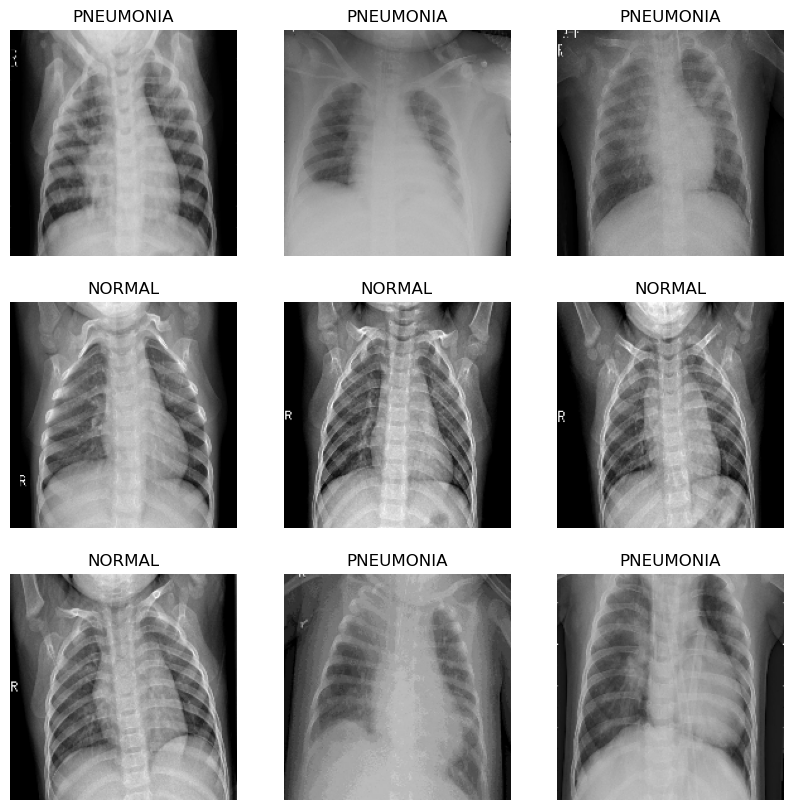

In [57]:
# Displays a 3x3 grid of sample images from the training dataset with their corresponding class labels.
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
    

Model Training

In [58]:
# Importing the Sequential model class from Keras for building neural networks.
from tensorflow.keras.models import Sequential

In [59]:
# Represents the necessary information about the training dataset during model training
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [73]:
# Constructs a CNN model with image normalization, convolutional layers, pooling, dropout, and dense layers for classification.

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [74]:
# Compiles the model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the evaluation metric.

model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [75]:
# Trains the model for 25 epochs using the training data and evaluates performance on the validation data.

epoch_size =25

history = model.fit(data_train, epochs=epoch_size, validation_data=data_val)

Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 510ms/step - accuracy: 0.8487 - loss: 0.4808 - val_accuracy: 0.8125 - val_loss: 0.3525
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 358ms/step - accuracy: 0.9623 - loss: 0.1105 - val_accuracy: 0.9375 - val_loss: 0.1359
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 352ms/step - accuracy: 0.9709 - loss: 0.0887 - val_accuracy: 0.8125 - val_loss: 0.3016
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 351ms/step - accuracy: 0.9735 - loss: 0.0759 - val_accuracy: 0.9375 - val_loss: 0.2524
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.9828 - loss: 0.0459 - val_accuracy: 0.8125 - val_loss: 0.4044
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 328ms/step - accuracy: 0.9826 - loss: 0.0487 - val_accuracy: 0.9375 - val_loss: 0.0800
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 346ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9375 - val_loss: 0.2293
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 341ms/step - accuracy: 0.9935 - loss: 0

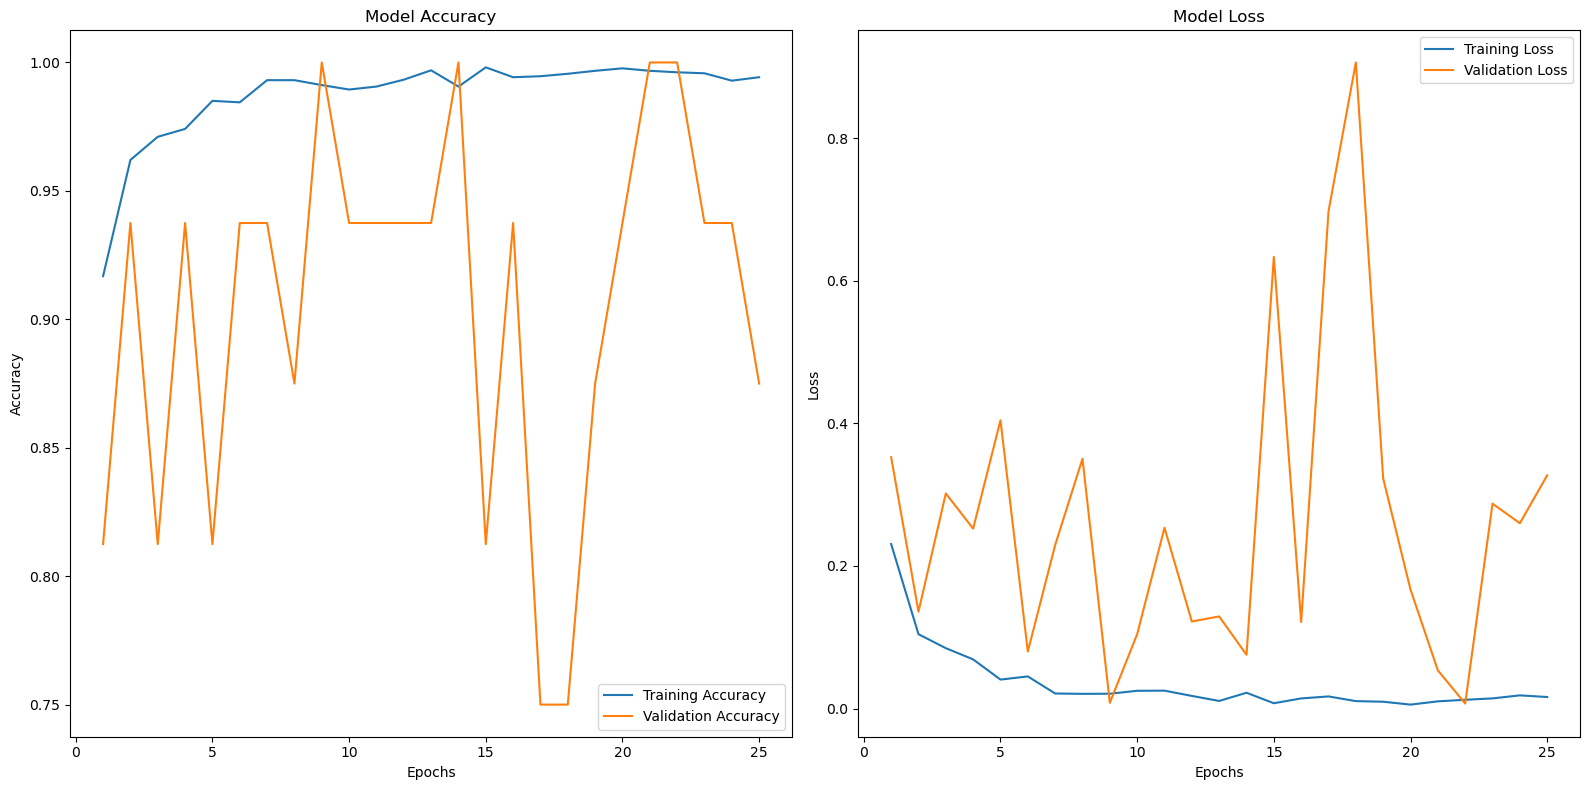

In [78]:
# Plots the training and validation accuracy and loss over epochs:
# - The left subplot shows accuracy trends for training and validation.
# - The right subplot shows loss trends for training and validation.

epoch_range = range(epoch_size)
import matplotlib.pyplot as plt

epoch_range = range(1, epoch_size + 1)

plt.figure(figsize=(16, 8))

# Accuracy plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(epoch_range, history.history['accuracy'], label="Training Accuracy")
plt.plot(epoch_range, history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Loss plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(epoch_range, history.history['loss'], label="Training Loss")
plt.plot(epoch_range, history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")

# Display the plots
plt.tight_layout()
plt.show()


Model Testing

In [92]:
# Loads an image, resizes it to the target dimensions, converts it to an array, and adds a batch dimension.

image = "val/PNEUMONIA/person1949_bacteria_4880.jpeg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [93]:
# Predicts the class probabilities for the given image batch using the trained model.

predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [94]:
# Applies the softmax function to the model's predictions to obtain class probabilities.

score = tf.nn.softmax(predict)

In [106]:
# Displaying the accuracy of the model

print("The scan shows {} chest with and accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))


The scan shows PNEUMONIA chest with and accuracy of 99.85


In [107]:
# Saving the model
model.save("Pneumonia-prediction.keras")